<a href="https://colab.research.google.com/github/BharatArora2006/XYZ-Education-Linear-Regression/blob/main/XYZ_Education_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Company XYZ has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective

# Business Problem
Your analysis will help XYZ in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn import linea

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/XYZ_Admission.csv")
df_orig = df.copy()

# NULL VALUES CHECK

In [ ]:
print("=====================")
print(df.columns.isna().any())
print("=====================")
print(df.isnull().any())
print("=====================")
print(df.isnull().sum()*100)
print("=====================")

False
Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


# Data doesnt contain Null Values

# Dataset Shape, Head, Tail,Sample and Data Types

In [ ]:
print(df.shape)
df.head()

(500, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [ ]:
df.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
433,434,316,111,4,4.0,5.0,8.54,0,0.71
368,369,298,92,1,2.0,2.0,7.88,0,0.51
343,344,305,103,2,2.5,3.5,8.13,0,0.59
98,99,332,119,4,5.0,4.5,9.24,1,0.90
160,161,315,103,1,1.5,2.0,7.86,0,0.57


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# Datatypes all okay. All Features are numerical either Integer or Decimal but No cateogrical variables. No action required on type conversion

# Checking Columns names

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

# There are some extra spaces in 2 columns. We will rename the extra to remove space

In [ ]:
df.rename(columns = {'Chance of Admit ':'Chance of Admit','LOR ':'LOR' }, inplace = True)
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Dropping unnessary variables for model creation
1.   Drop Serial No.




In [ ]:
df_revised = df.drop(['Serial No.'], axis = 1)
df_revised.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
434,306,103,3,3.5,3.0,8.21,0,0.64
270,306,105,2,2.5,3.0,8.22,1,0.72
420,299,100,3,2.0,3.0,7.42,0,0.42
283,321,111,3,2.5,3.0,8.90,1,0.80
194,316,109,3,3.5,3.0,8.76,0,0.77


# Checking for correlation matrix


In [ ]:
df_corr = df_revised.corr()
df_corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


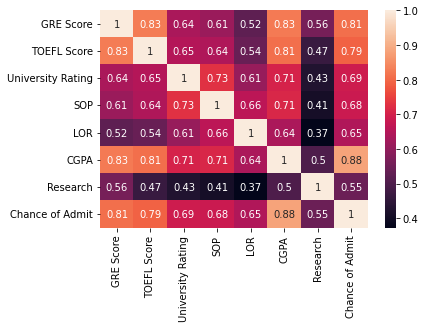

In [ ]:
df_revised = df.drop(['Serial No.'], axis = 1)
hm = sns.heatmap(data = df_corr, annot = True)

# Basis Correlation matrix - there is stronng correlation between GRE Score, TOEFL Score and CGPA.

# So we will drop GRE Score and TOEFL Score and keep only CGPA as a part of EDA


# Building Linear Regression Plots for Best fit line

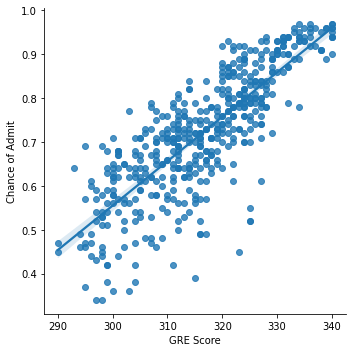

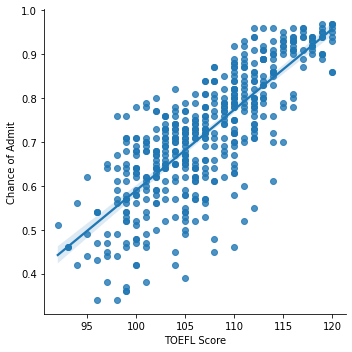

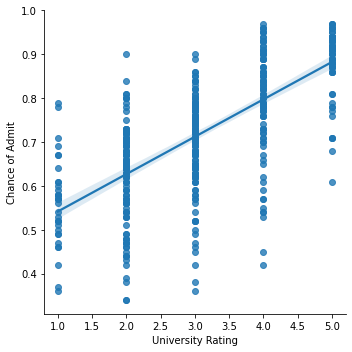

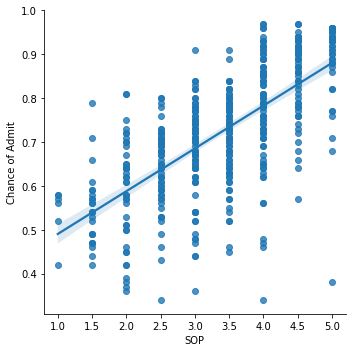

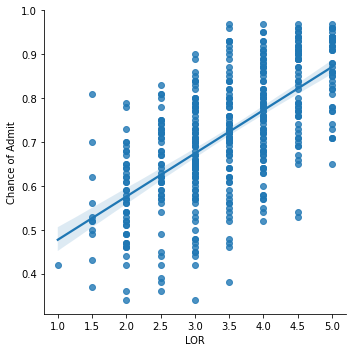

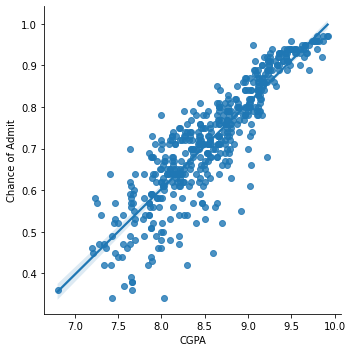

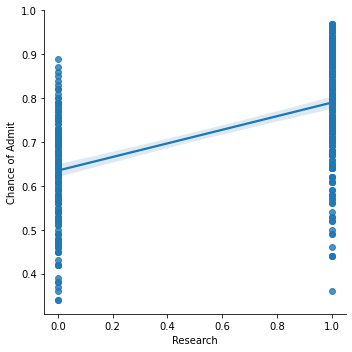

In [ ]:
cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research']
for i in cols:
  sns.lmplot(x=i, y='Chance of Admit', data=df_revised)

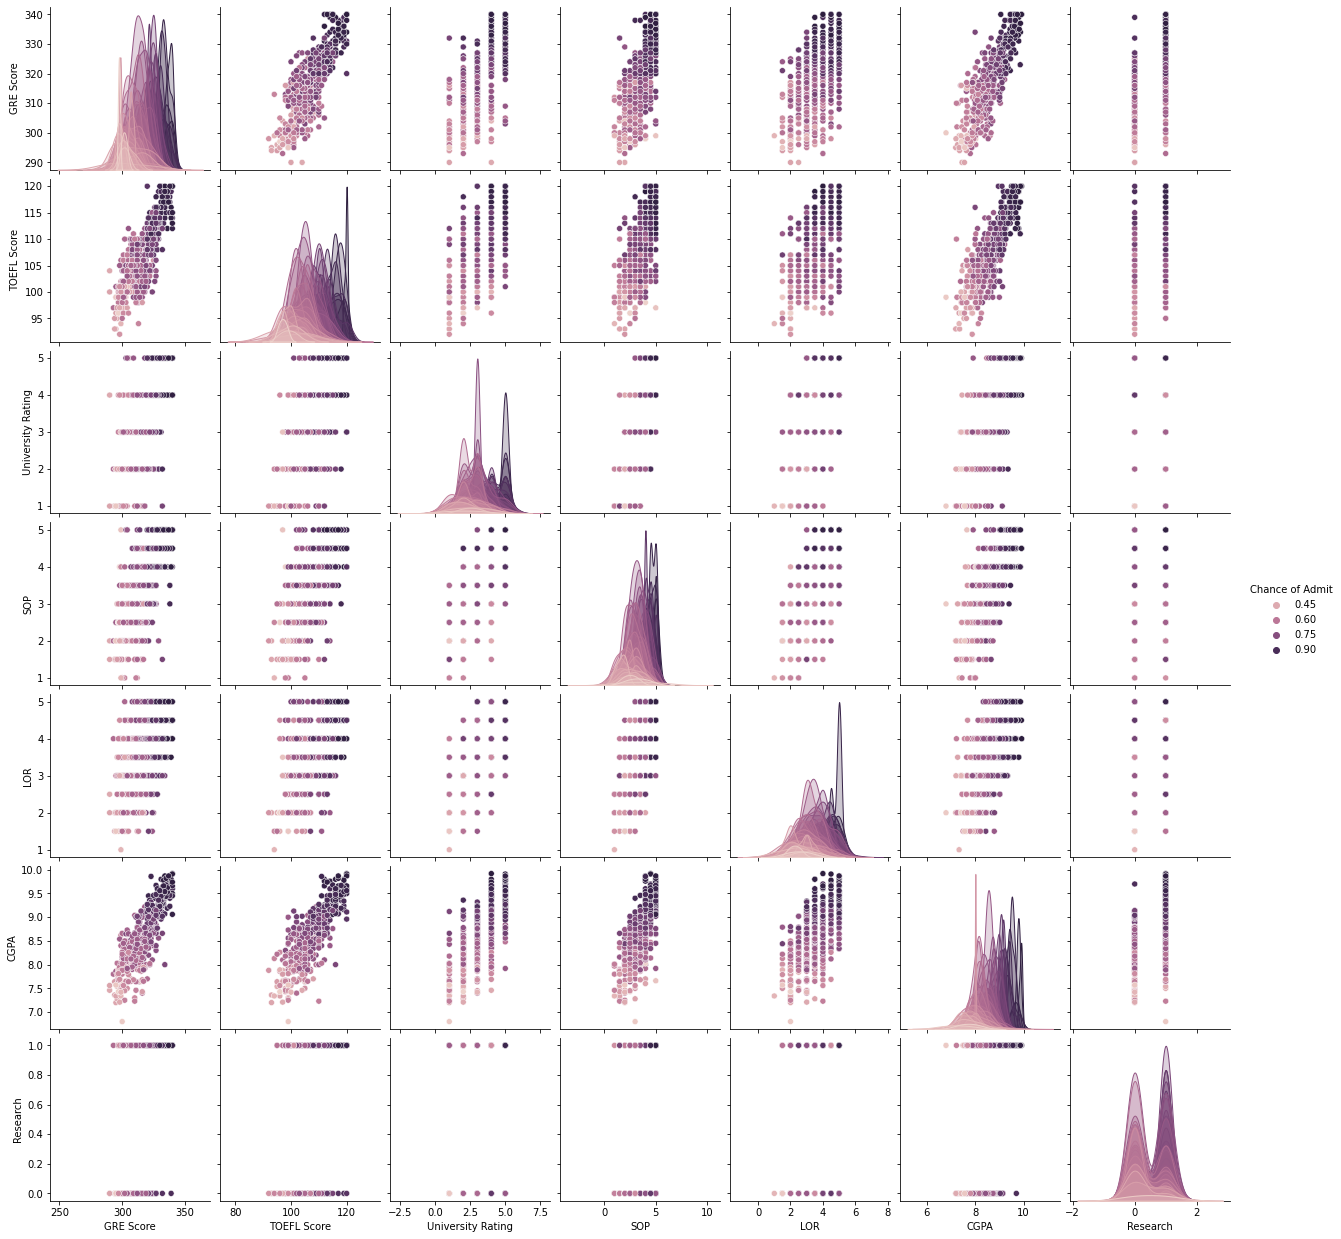

In [ ]:
sns.pairplot(data = df_revised, hue= 'Chance of Admit')

# Checking distribution via KDE displot

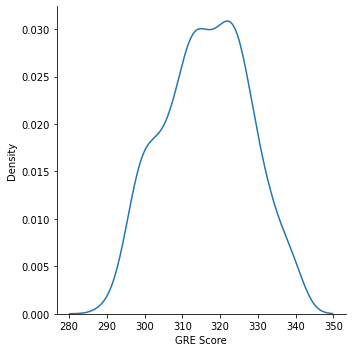

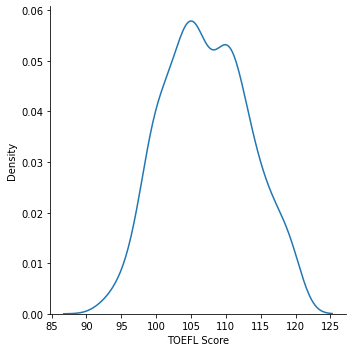

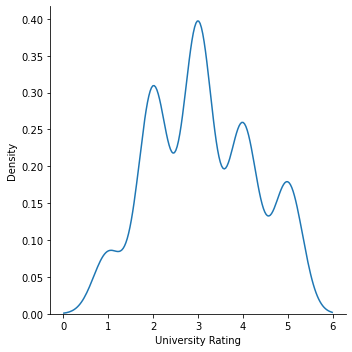

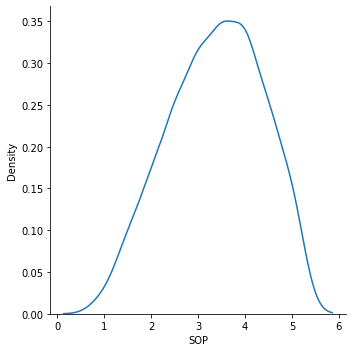

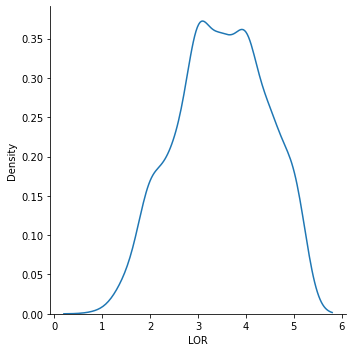

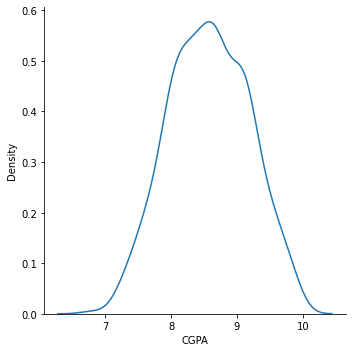

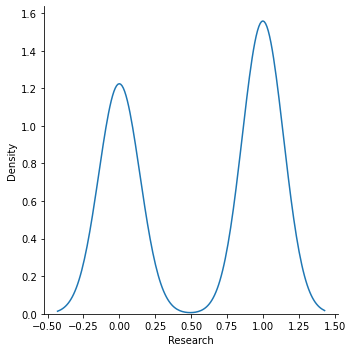

In [ ]:
cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research']
for i in cols:
  sns.displot(df_revised[i], kind='kde')

# BUILDING LINEAR REGRESSION MODEL

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
## Data Before Scaling
df_revised.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


In [ ]:
## Min Max Scaling
mm = MinMaxScaler()
cols = df_revised.columns
df_revised[cols] = mm.fit_transform(df_revised[cols])

## Verify scaled data
df_revised.sample(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
474,0.36,0.464286,0.75,0.50,0.375,0.368590,1.0,0.523810
340,0.44,0.535714,0.50,0.50,0.500,0.532051,1.0,0.650794
489,0.24,0.642857,0.50,0.75,0.875,0.544872,0.0,0.492063


In [ ]:
## Separting Independent & Target Variable
X = df_revised.drop(['Chance of Admit','GRE Score','TOEFL Score'],axis = 1)
Y = df_revised['Chance of Admit']

## Splitting Data into Train and Test
X_train,X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [ ]:
## Adding the constant
X_sm = sm.add_constant(X)
X_sm.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,University Rating,SOP,LOR,CGPA,Research
0,1.0,0.75,0.875,0.875,0.913462,1.0
1,1.0,0.75,0.750,0.875,0.663462,1.0
2,1.0,0.50,0.500,0.625,0.384615,1.0
3,1.0,0.50,0.625,0.375,0.599359,1.0
4,1.0,0.25,0.250,0.500,0.451923,0.0


In [ ]:
sm_model = sm.OLS(Y, X_sm).fit()
print(sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     410.5
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          2.63e-173
Time:                        17:04:43   Log-Likelihood:                 448.98
No. Observations:                 500   AIC:                            -886.0
Df Residuals:                     494   BIC:                            -860.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0186      0.01

# R2 square using Stats Model (OLS Regression) is 0.8 which is very good.

# All Coef are postive which means all factors have a postive impact on Target Variable

# There 1 variable -  "SOP" where P value is less than 0.05 (i.e 5%), so its weight (w) is likely close to 0, so it can be discarded


# Testing the assumptions of linear regression

##Multicollinearity check by VIF score

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values,i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,CGPA,20.51
1,SOP,18.80
2,LOR,14.99
0,University Rating,10.94
4,Research,3.04


# All Variables except Research have VIF greater than 10, so we can drop them. Only Variable that can be kept is Research.

In [ ]:
# print(X.columns)
cols2 = ['Research']
X2 = X[cols2]
X2_sm = sm.add_constant(X2)
sm_model = sm.OLS(Y, X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     211.4
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           3.60e-40
Time:                        17:39:12   Log-Likelihood:                 127.46
No. Observations:                 500   AIC:                            -250.9
Df Residuals:                     498   BIC:                            -242.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4681      0.013     36.952      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Basis VIF  check - Just keeping one variable is decreasing the R2 score significantly making it a bad model. The model is not learning good and have high bias. So we should not drop variables using VIF.

# Creating another Model

In [ ]:
modellr = LinearRegression()
modellr.fit(X_train, Y_train)
print("Coef===========",modellr.coef_)
print("Score==========",modellr.score(X_train, Y_train))

Coef=========== [0.09603814 0.00336582 0.07455854 0.76316493 0.05902098]
Score========== 0.7994458294606741


# The Linear Regression model has a score of 0.79 which is really good.

# ERROR Distribution Graph

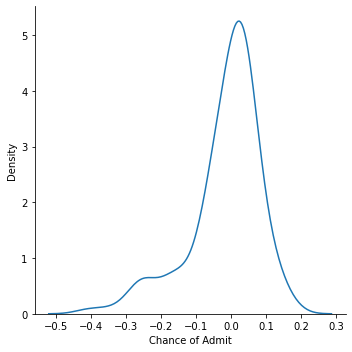

In [ ]:
Y_hat= modellr.predict(X_test)
error = Y_test - Y_hat
sns.displot(error, kind = 'kde')

# Errors are normalized.

In [ ]:
np.mean(error)

-0.017262444372656085

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_hat)

0.010608450498352288

# ERRORS Scatter Plot

Text(0, 0.5, 'Residuals')

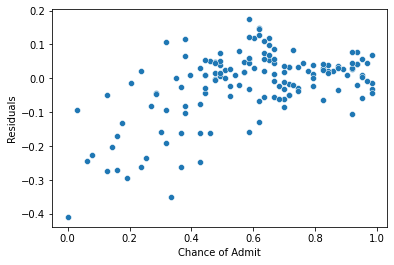

In [ ]:
sns.scatterplot(x = Y_test, y=error)
plt.ylabel('Residuals')

# 1) Errors doesnt have Autocorrelation since there is no pattern.
# 2) Errors doesnt show Homoscedasticity

# MSE

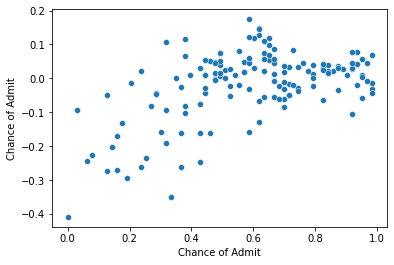

In [ ]:
from sklearn.metrics import mean_squared_error
errors = Y_test - Y_hat
sns.scatterplot(x= Y_test, y = errors)


# Actionable Insights & Recommendations
===================================
# 1) There is a linear relationship between the Input variables and Target variable (Chance of Admit)
# 2) All variables have a postive impact on Target Variable. Increase in any variable increases the chance of admission in good college.
# 3) CGPA followed by GRE and TOEFL score have high impact on chances of admission. Increase in these factors will greatly increase the chances of admission
# 4) SOP doesnt have impact but its least among all factors. After SOP - University rating and Research - also have low impact on Chances of admission in good college.
